In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import file_organizers.file_reading as fr
import threshold_metrics as tm
import metrics_plotting as mp

In [2]:
type_ = '550k'
test_split = 0

In [3]:
inference_folder = '/Users/sishitan/Documents/Scripts/qusi_project/qusi/inferences/'
inference_file = f'results_ts{test_split}_{type_}_with_tags.csv'

In [4]:
# Getting cuts based on threshold
threshold_value = 0.5
inference_df = fr.read_inference_with_tags_and_labels(inference_folder + inference_file)
inference_with_threshold = tm.threshold_prediction_setter(inference_df, threshold_value)
true_labels = inference_with_threshold['true_label']
predictions = inference_with_threshold['prediction']

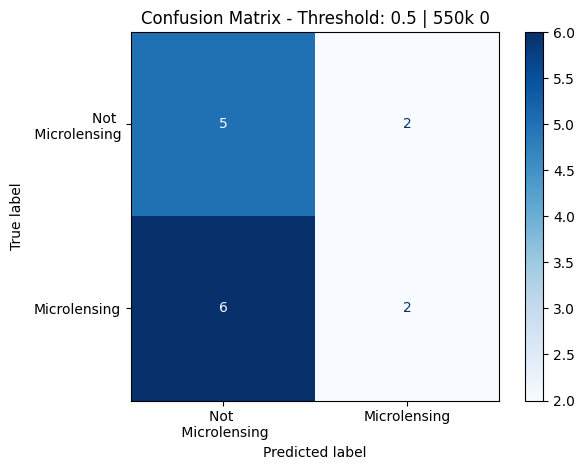

In [5]:
# Confusion Matrix
mp.confusion_matrix_plotter(true_labels, predictions, inference_folder, type_, test_split, threshold_value,
                            show_plot=True)

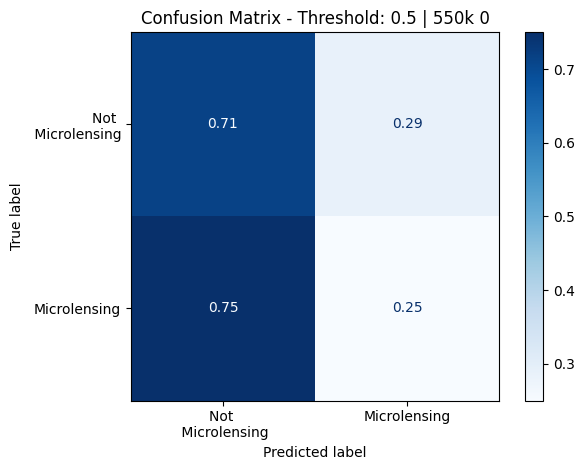

In [6]:
# Normalized Confusion Matrix
mp.confusion_matrix_plotter(true_labels, predictions, inference_folder, type_, test_split, threshold_value,
                            show_plot=True, should_normalize_='true')

In [7]:
# Printing the performance metrics
true_positives, false_positives, true_negatives, false_negatives = tm.performance_calculator(true_labels, predictions)
print('True Positives: ', true_positives)
print('False Positives: ', false_positives)
print('True Negatives: ', true_negatives)
print('False Negatives: ', false_negatives)

True Positives:  2
False Positives:  2
True Negatives:  5
False Negatives:  6


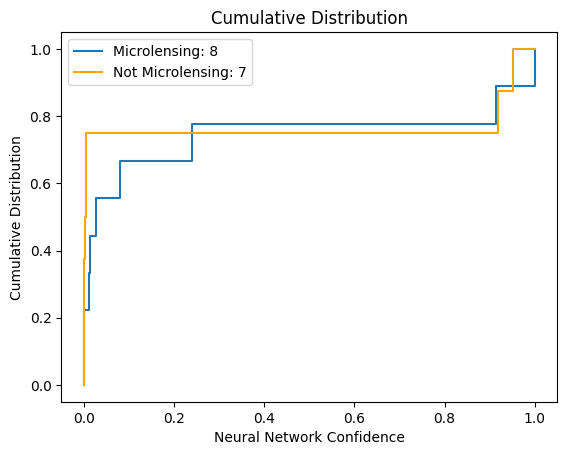

In [8]:
# Cumulative distribution
mp.inference_cumulative_distribution(inference_with_threshold, show_plot=True)